# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

In [2]:
def plot_total(run_folder: str, state: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'out', run_folder)
    
    df = pd.DataFrame(columns=['threshold', 'rho', 'Value'])
    
    for filename in os.listdir(run_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T=(\d+\.\d+)_(\d+\.\d+)_totals.csv', filename)
        
        if match == None:
            continue
        
        threshold = float(match.groups()[0])
        rho = float(match.groups()[1])
        
        totals_df = pd.read_csv(os.path.join(run_folder_path, filename))
        value = totals_df.iloc[-1][state]
        
        row = {'threshold': threshold, 'rho': rho, 'Value': value}
        
        new_df = pd.DataFrame([row])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='threshold', columns='rho', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    ax.invert_yaxis()
    
    plt.title(f'Total {state}')

    plt.show()

In [4]:
def plot_flatness(run_folder: str, state: str, func):
    run_folder_path = os.path.join(os.path.abspath('../'), 'out', run_folder)
    
    df = pd.DataFrame(columns=['threshold', 'rho', 'Value'])
    
    for filename in os.listdir(run_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+_T=(\d+\.\d+)_(\d+\.\d+)_states.csv', filename)
        
        if match == None:
            continue
        
        threshold = float(match.groups()[0])
        rho = float(match.groups()[1])
        
        states_df = pd.read_csv(os.path.join(run_folder_path, filename))
        value = func(states_df[state])
        
        row = {'threshold': threshold, 'rho': rho, 'Value': value}
        
        new_df = pd.DataFrame([row])
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
        
    result = df.pivot(index='threshold', columns='rho', values='Value')
    ax = sns.heatmap(result, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
    ax.invert_yaxis()
    
    plt.title(f'Total {state}')

    plt.show()

# Oldest

# Youngest

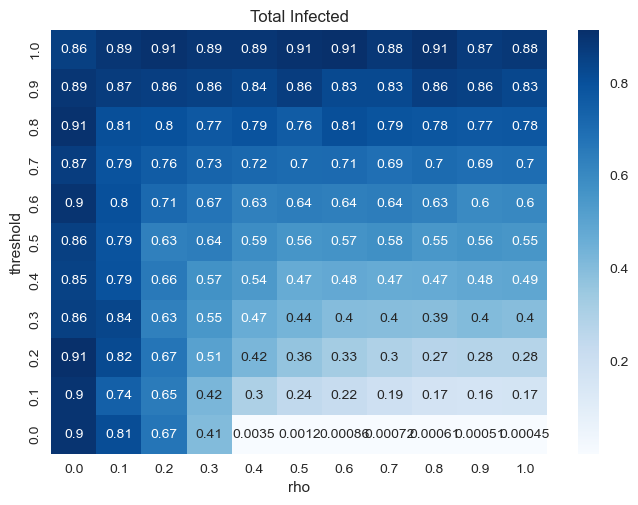

In [3]:
plot_total('threshold_dependent_youngest', 'Infected')

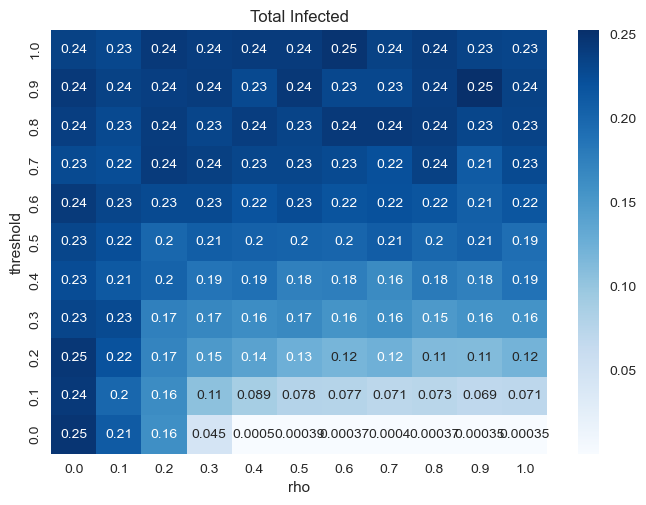

In [5]:
plot_flatness('threshold_dependent_youngest', 'Infected', np.max)

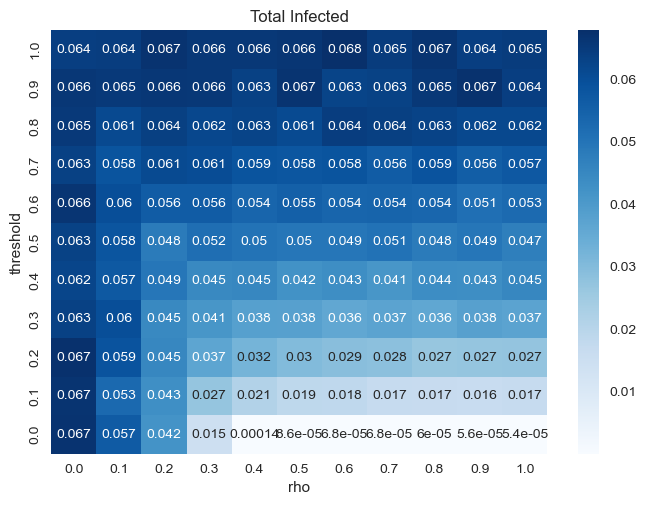

In [6]:
plot_flatness('threshold_dependent_youngest', 'Infected', np.std)